In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy.polynomial.polynomial as poly
import warnings

import yfinance as yf

# Load stock info

In [2]:
# Download stock info
# stock_info = yf.download("^HSI", start="2000-01-01", end="2003-06-15")
stock_info = yf.download("AAPL", start="2000-01-01", end="2003-06-15")
# stock_info = yf.download("AAPL", start="2000-01-01", end="2021-08-16")
# stock_info = yf.download("NVDA", start="2021-01-01", end="2021-08-16")
stock_info

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,0.901228,0.918527,0.888393,0.917969,0.788183,163811200
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.858137,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.785788,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.797286,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.728291,767972800
...,...,...,...,...,...,...
2003-06-09,0.302500,0.304286,0.296964,0.299821,0.257431,259952000
2003-06-10,0.301607,0.308750,0.299107,0.306786,0.263411,176646400
2003-06-11,0.306250,0.312679,0.300179,0.311607,0.267551,225114400


In [3]:
# Load the stock close data
stock_close_data = pd.DataFrame(stock_info["Close"])
stock_close_data

,Close
Date,
1999-12-31,0.917969
2000-01-03,0.999442
2000-01-04,0.915179
2000-01-05,0.928571
2000-01-06,0.848214
...,...
2003-06-09,0.299821
2003-06-10,0.306786
2003-06-11,0.311607


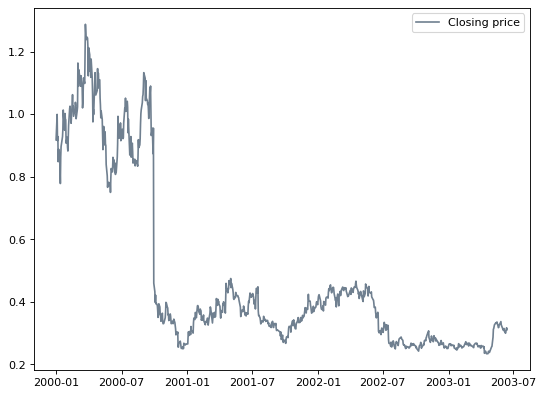

In [4]:
# Plot data
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.legend()
plt.show()

# Find Trend

In [5]:
# See https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
degree = 50

X = np.array(stock_close_data.reset_index().index)
Y = stock_close_data["Close"].to_numpy()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", np.RankWarning)
    poly_fit = np.poly1d(np.polyfit(X, Y, degree))

stock_trend = pd.DataFrame(poly_fit(X))
stock_trend.index = stock_close_data.index
stock_trend

,0
Date,
1999-12-31,0.813790
2000-01-03,0.857652
2000-01-04,0.891527
2000-01-05,0.916909
2000-01-06,0.935140
...,...
2003-06-09,0.316846
2003-06-10,0.321941
2003-06-11,0.323433


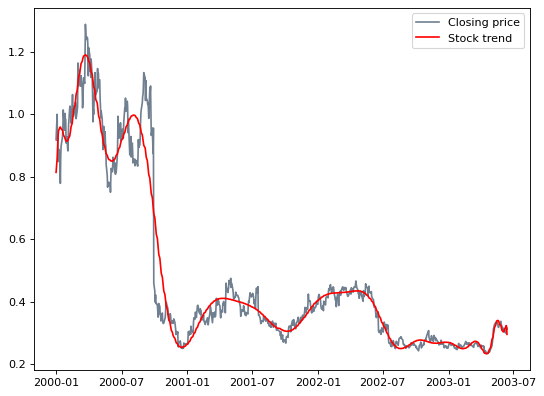

In [6]:
# Plot data
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(stock_close_data, label="Closing price", color="slategrey")
plt.plot(stock_trend, label="Stock trend", color='red')
plt.legend()
plt.show()